In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
df = pd.read_csv("C:/Users/purav parekh/Desktop/College/SEM 6/Data Analytics/BSE_30.csv")

In [3]:
df_yes=df[df['Symbol'].str.contains('YESBANK')]

In [4]:
df_yes.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
68378,YESBANK,5/6/2008,35.779999,36.000000,34.160000,34.889999,23.188095,1632340.0
68379,YESBANK,5/7/2008,35.000000,35.480000,34.250000,35.060001,23.301077,944770.0
68380,YESBANK,5/8/2008,34.400002,34.950001,33.639999,34.009998,22.603241,881575.0
68381,YESBANK,5/9/2008,33.779999,34.299999,32.419998,32.660000,21.706022,847145.0
68382,YESBANK,5/12/2008,32.220001,32.799999,31.430000,32.349998,21.499992,1148050.0


In [5]:
df_yes.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_yes['Date'] = pd.to_datetime(df['Date'])
df_yes = df_yes.set_index(['Date'], drop=True)
df_yes.head(10)

C:\Users\purav parekh\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\purav parekh\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Symbol,Adj Close
Date,,
2008-05-06,YESBANK,23.188095
2008-05-07,YESBANK,23.301077
2008-05-08,YESBANK,22.603241
2008-05-09,YESBANK,21.706022
2008-05-12,YESBANK,21.499992
2008-05-13,YESBANK,21.260735
2008-05-14,YESBANK,21.712667
2008-05-15,YESBANK,22.875729
2008-05-16,YESBANK,22.709579


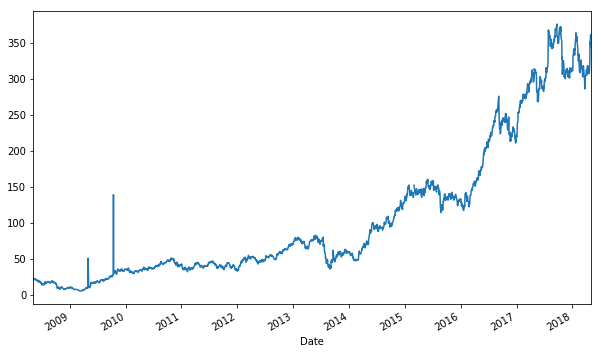

In [6]:
plt.figure(figsize=(10, 6))
df_yes['Adj Close'].plot();

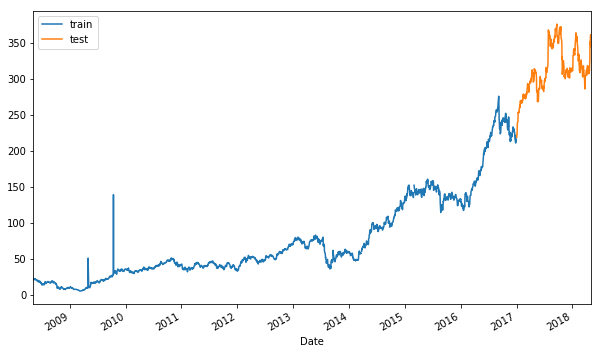

In [7]:
split_date = pd.Timestamp('2017-01-01')
df_yes =  df_yes['Adj Close']
train = df_yes.loc[:split_date]
test = df_yes.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))


In [21]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 23.188095  23.301077  22.603241 ... 213.824326 220.53334  221.963425].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]


NameError: name 'train_sc' is not defined